In [103]:
# imports
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [104]:
# import data

df_original = pd.read_csv('adult.data.csv', header=None)

# cols
df_original.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df= df_original.copy()
print('Cantidad de registros: ', df.shape[0])

Cantidad de registros:  32561


In [105]:
# drop columnas que no nos interesan 
df.drop(['fnlwgt', 'native_country'], axis=1, inplace=True)

In [106]:
# segmentacion de columnas
num_cols = df.select_dtypes(include=['int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [107]:
num_cols

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [108]:
cat_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'income'],
      dtype='object')

In [109]:
df.dropna(inplace=True)

In [110]:
# one hot encoding
df= pd.get_dummies(df, columns=cat_cols, drop_first=True)
df = df.astype(int)

# normalizacion de variables numericas
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])



In [111]:
df

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,1.057047,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,-0.775768,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.746039,-0.145920,-0.21666,-0.197409,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
32557,0.103983,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
32558,1.423610,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
32559,-1.215643,-0.420060,-0.145920,-0.21666,-1.655225,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [112]:

def K_means_silhouette(df):
    '''
    Visualiza el coeficiente de silueta para determinar el número óptimo de clusters.
    Parameters:
        df (pd.DataFrame): Dataframe a utilizar.
        model_name (str): Nombre del modelo a utilizar.
        output_file_path (str): Path donde se guardará la visualización.  
    Returns:
        optimal_k (int): Número óptimo de clusters.
    '''
    k_range = range(2, 11)
    sil = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        score = silhouette_score(df, kmeans.labels_)
        sil.append(score)
    optimal_k = k_range[0]
    max_sil = float('-inf')
    for i, k in enumerate(k_range):
        if 2 < k < 8 and sil[i] > max_sil:
            max_sil = sil[i]
            optimal_k = k
            plt.figure(figsize=(10, 6))
            plt.plot(k_range, sil, marker='o')
            plt.xlabel('NÚMERO DE CLUSTERS (k)')
            plt.ylabel('COEFICIENTE DE SILUETA')
            plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
            plt.title(f'MÉTODO DE COEF. SILUETA', fontweight='bold', fontsize=12)
            return optimal_k

3

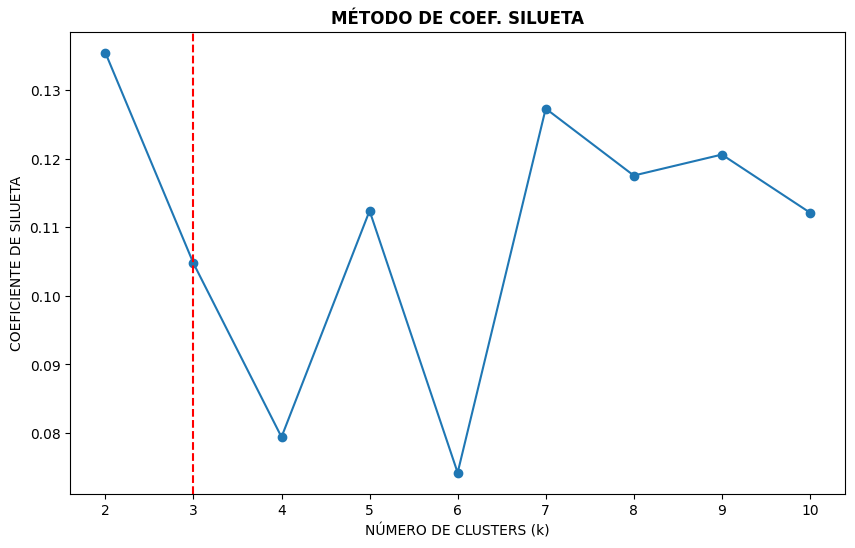

In [113]:
K_means_silhouette(df)

In [114]:
# clustering
# kmeans
kmeans = KMeans(n_clusters=7, random_state=0)
df['cluster_kmeans'] = kmeans.fit_predict(df)

# agglomerative
#agg = AgglomerativeClustering(n_clusters=4)
#df['cluster_agg'] = agg.fit_predict(df)



Text(0.5, 1.0, 'PCA')

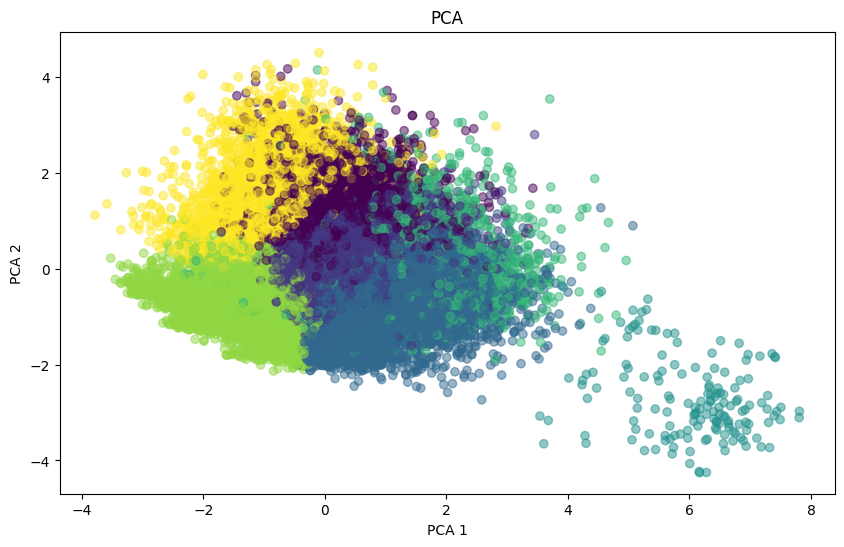

In [115]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)

df_pca = pca.fit_transform(df.drop(['cluster_kmeans'], axis=1))

df['pca_1'] = df_pca[:, 0]
df['pca_2'] = df_pca[:, 1]

# plot
plt.figure(figsize=(10, 6))
plt.scatter(df['pca_1'], df['pca_2'], c=df['cluster_kmeans'], cmap='viridis', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA')



/Users/benjamin/Documents/GitHub/Proyecto_mineria_cc5205/.venv/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Text(0.5, 1.0, 'UMAP')

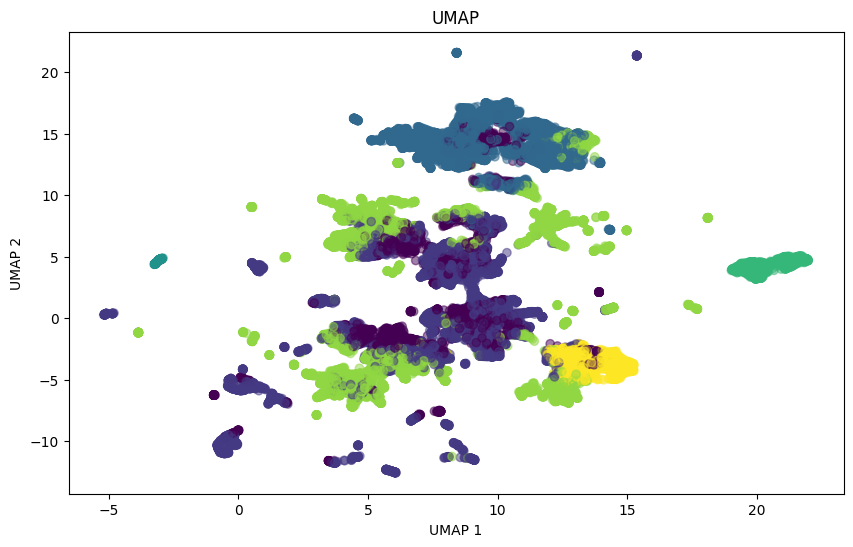

In [116]:
# umap
import umap

umap_ = umap.UMAP(n_components=2, random_state=0)
df_umap = umap_.fit_transform(df.drop(['cluster_kmeans'], axis=1))

df['umap_1'] = df_umap[:, 0]
df['umap_2'] = df_umap[:, 1]

# plot
plt.figure(figsize=(10, 6))
plt.scatter(df['umap_1'], df['umap_2'], c=df['cluster_kmeans'], cmap='viridis', alpha=0.5)

plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP')
